In [1]:
# import neccessaries libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [2]:
# importing the dataset
data = pd.read_csv("fin_data.csv", sep=';')

In [3]:
# previewing the dataset
data.head()

,component,action,target,objectid,contextid,contextlevel,contextinstanceid,userid,courseid,timecreated
0,mod_page,viewed,course_module,7027,212936,70,95231,17,1489,1550343718
1,mod_resource,viewed,course_module,32534,213483,70,95760,10746,1489,1550349523
2,mod_resource,viewed,course_module,32532,213481,70,95758,10746,1489,1550349602
3,mod_resource,viewed,course_module,32534,213483,70,95760,10746,1489,1550349773
4,mod_resource,viewed,course_module,32280,212944,70,95239,10746,1489,1550352803


In [4]:
# printing the missing values
print(data.isnull().sum())

component            0
action               0
target               0
objectid             0
contextid            0
contextlevel         0
contextinstanceid    0
userid               0
courseid             0
timecreated          0
dtype: int64


In [5]:
# getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44285 entries, 0 to 44284
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   component          44285 non-null  object
 1   action             44285 non-null  object
 2   target             44285 non-null  object
 3   objectid           44285 non-null  int64 
 4   contextid          44285 non-null  int64 
 5   contextlevel       44285 non-null  int64 
 6   contextinstanceid  44285 non-null  int64 
 7   userid             44285 non-null  int64 
 8   courseid           44285 non-null  int64 
 9   timecreated        44285 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.4+ MB


In [6]:
# feature vector
X = data

# target variable
y = data['component']
y = data['action']
y = data['target']



# importing label encoder
from sklearn.preprocessing import LabelEncoder

# converting the non-numeric to numeric values
le = LabelEncoder()
X['component'] = le.fit_transform(X['component'])
X['action'] = le.fit_transform(X['action'])
X['target'] = le.fit_transform(X['target'])



y = le.transform(y)

In [7]:
# printing the dataset
X.head()

,component,action,target,objectid,contextid,contextlevel,contextinstanceid,userid,courseid,timecreated
0,7,11,3,7027,212936,70,95231,17,1489,1550343718
1,9,11,3,32534,213483,70,95760,10746,1489,1550349523
2,9,11,3,32532,213481,70,95758,10746,1489,1550349602
3,9,11,3,32534,213483,70,95760,10746,1489,1550349773
4,9,11,3,32280,212944,70,95239,10746,1489,1550352803


In [8]:
# importing k-mean
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=2, random_state=0) 

# fitting the values
kmeans.fit(X)

# Cluster centers
kmeans.cluster_centers_

array([[9.06210577e+00, 9.04663324e+00, 4.64251442e+00, 8.14029544e+04,
        2.15952945e+05, 7.00000000e+01, 9.65621094e+04, 2.05416459e+04,
        1.48900000e+03, 1.55473559e+09],
       [8.50784893e+00, 1.02437053e+01, 2.67015076e+00, 1.09761987e+05,
        2.14376843e+05, 7.00000000e+01, 9.59243944e+04, 2.07883324e+04,
        1.48900000e+03, 1.55898577e+09]])

In [9]:
# printing the value of inertia
print (kmeans.inertia_)

9.28893612570614e+16


In [10]:
# stroing labels
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

# printing the results
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 11865 out of 44285 samples were correctly labeled.


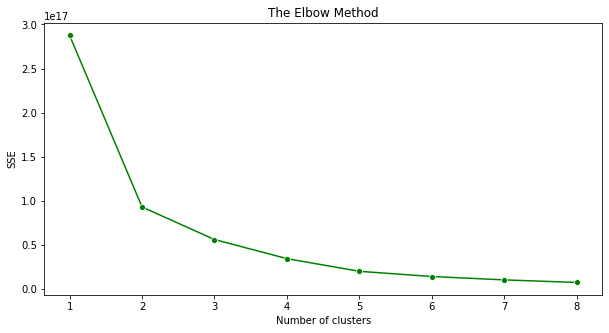

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

# to store WCSS
wcss = []

# for loop 
for i in range(1, 9):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# importing the matplotlib module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 9), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans.labels_
 
print(metrics.calinski_harabasz_score(X, labels))

91714.64338887046


In [13]:
kmeans = KMeans(n_clusters=4, random_state=20)
labels = kmeans.fit_predict(X)

db_index = davies_bouldin_score(X, labels)
print(db_index)

0.40738342344782064
